**Load the required libraries** 

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the required data
appointment_df = pd.read_csv("../data/Appointments List.csv", 
                             encoding='UTF-16', delimiter="\t")

# Explanatory Data Analysis 
## Data Assessment 

In [3]:
# first few rows 
appointment_df.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID
0,Grand Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,"55,975",*
1,1,Made,01/01/00,NaN,NaN,N,Default,NaN,system,",",NaN,Other,NaN,1,1,1
2,109,Seen,01/22/18,1,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,2,1,"5,283"
3,239,Seen,01/22/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,3,1,"5,286"
4,240,Made,01/22/18,9,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,4,1,"5,351"


In [4]:
# Data info summary 
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55976 entries, 0 to 55975
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Appointment UID           55976 non-null  object
 1   Appt Status Description   55976 non-null  object
 2   Date Of Service           37250 non-null  object
 3   Chartnumber               55975 non-null  object
 4   NurseName                 19321 non-null  object
 5   FirstTreatmentApptInd     54678 non-null  object
 6   Appt Type Group           54678 non-null  object
 7   Appt Type                 54677 non-null  object
 8   Created By                55976 non-null  object
 9   Provider                  55976 non-null  object
 10  Facility City             51738 non-null  object
 11  Room                      55976 non-null  object
 12  Column Heading            54697 non-null  object
 13  #                         55976 non-null  object
 14  Count of tblAppointmen

In [5]:
# Duplicated? 
appointment_df.duplicated().sum()

0

In [6]:
# Who are the nurses?
appointment_df["NurseName"].unique()

array(['Total', nan, 'DANIEL THOMPSON', 'EDWARD ALMEIDA',
       'OLGA PAVLEYEVA', 'DANA COLLEY', 'Daniel Thompson',
       'Kelsey Paydos', 'Katherine Marcinkus', 'Doreen Rynne, RN',
       'Erin Reilly, RN', 'Mona Itani, MD', "Kaitlin O'Donnell",
       'Stephanie Hogan', 'Odessa Holt', 'Melissa Martin', 'Sarah Slote',
       'Sara Glick', 'Holly Randall', 'Jake Keenan', 'Olivia Hendy',
       'Kimberly Dowdie'], dtype=object)

In [7]:
# What types of appointments? 
appointment_df["Appt Status Description"].unique()

array(['Total', 'Made', 'Seen', 'Deleted', 'Cancelled', 'No Show',
       'Other', 'Arrived', 'Moved'], dtype=object)

## Data Wrangling 

In [8]:
# Drop the first row of the data frame
appointment_df.drop(index=0, inplace=True)
appointment_df.reset_index(drop=True, inplace=True)

# Confirm 
appointment_df.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID
0,1,Made,01/01/00,NaN,NaN,N,Default,NaN,system,",",NaN,Other,NaN,1,1,1
1,109,Seen,01/22/18,1,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,2,1,"5,283"
2,239,Seen,01/22/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,3,1,"5,286"
3,240,Made,01/22/18,9,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,4,1,"5,351"
4,241,Made,02/02/18,6,NaN,N,Intake,KETAMINE INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,5,1,"5,348"


In [9]:
# Convert to time series data
appointment_df["Date"] = pd.to_datetime(appointment_df["Date Of Service"], errors="coerce")

In [10]:
# Replace "Made" to "Seen" and "Deleted" to "Cancelled"
appointment_df["Appt Status Description"].replace({
    "Made":"Seen",
    "Deleted": "Cancelled"
}, inplace=True)


appointment_df["Appt Status Description"].unique()

array(['Seen', 'Cancelled', 'No Show', 'Other', 'Arrived', 'Moved'],
      dtype=object)

## Data Visualization

Text(0.5, 1.0, 'Appointment Status')

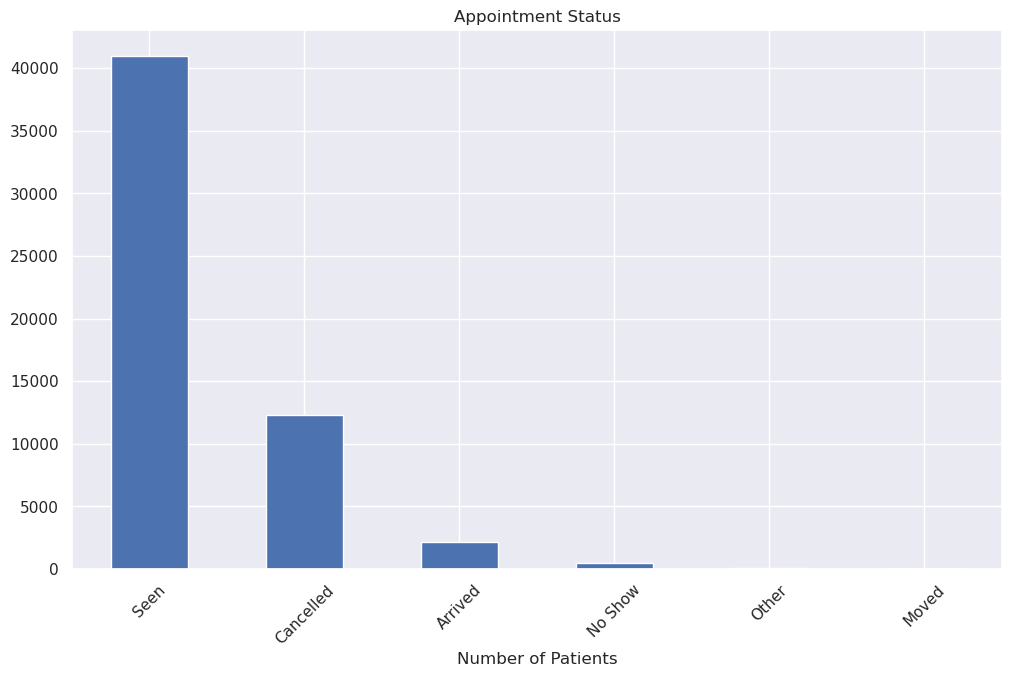

In [11]:
# Compare the appointments with bar chart
%matplotlib inline 
sns.set()

appointment_df["Appt Status Description"].value_counts().plot(
    kind="bar", rot=45, figsize=(12, 7)
)
plt.xlabel("Number of Patients")
plt.title("Appointment Status")

In [12]:
# Get the patients who had a successfull appointment
seen_df = appointment_df[appointment_df["Appt Status Description"]=="Seen"].reset_index(drop=True)

seen_df.shape

(40985, 17)

**Are there 'returning' patients in the appointments?**

In [13]:
uniqueness = seen_df["Patient FID"].nunique()/seen_df.shape[0] * 100

print(f"There is a {round(uniqueness, 2)}% unique patients among all the total appointments")

There is a 4.34% unique patients among all the total appointments


Most the patients have visited the facilities severally, lets find how frequenctly the patients make appointments

Text(0, 0.5, 'Frequency')

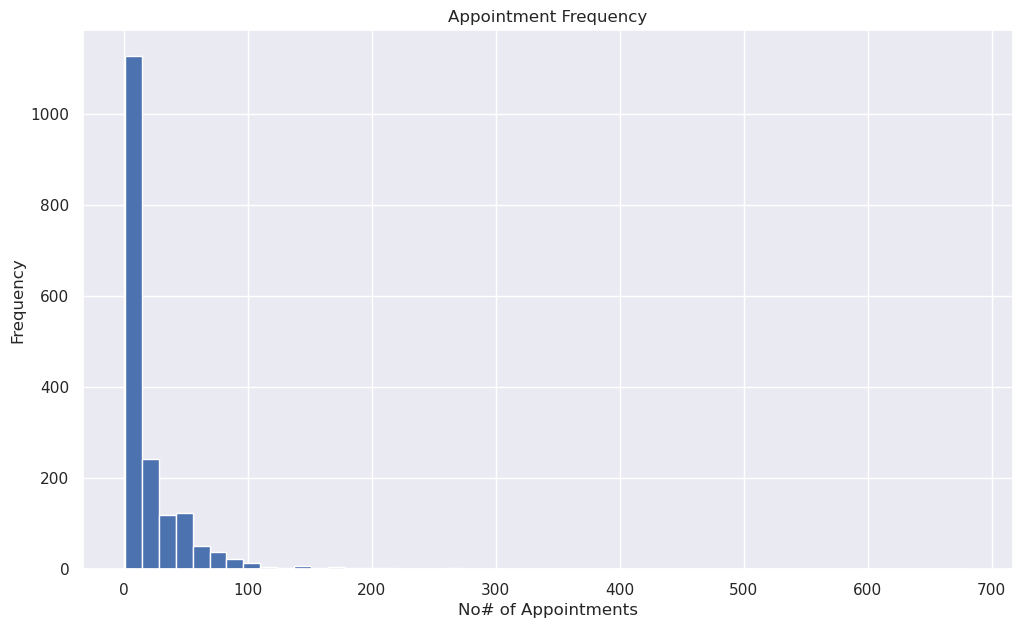

In [14]:
# seen_df[seen_df["Patient FID"]].groupby("Patient FID").count()
appointment_frequency = seen_df["Patient FID"].value_counts().values

# Plot on a histogram 
%matplotlib inline
sns.set()

plt.figure(figsize=(12, 7))
plt.hist(appointment_frequency, bins=50)
plt.title("Appointment Frequency")
plt.xlabel("No# of Appointments")
plt.ylabel("Frequency")

**How many amongst the seen was their first appointment?**

In [15]:
seen_df["FirstTreatmentApptInd"].unique()

array(['N', 'Y', nan], dtype=object)

<Axes: ylabel='count'>

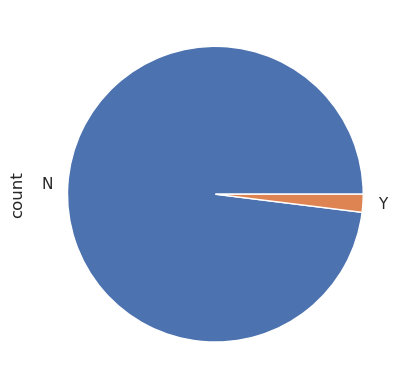

In [16]:
# Plot the data  
seen_df["FirstTreatmentApptInd"].value_counts().plot(kind="pie")

Most of them it was not their first time to visit the health center. Lets find out among the first timers if they had an intake

In [17]:
first_timer_df = seen_df[seen_df["FirstTreatmentApptInd"]=="Y"].reset_index(drop=True)

# Who had an intake? 
first_timer_df["Appt Type Group"].value_counts()

Appt Type Group
MH Infusion        395
TMS                330
KAP Integration     49
Intake               3
Name: count, dtype: int64

**A funnel Chart that will narrow down the number of appointments at each stage**

In [18]:
import plotly.express as px

In [19]:
# Count the total appointments
total_appointments = appointment_df.shape[0]

# Count successful appointments 
successful_appnts = appointment_df[appointment_df["Appt Status Description"]=="Seen"].shape[0]

# Count First time visitors therein
first_time_visitors = seen_df[seen_df["FirstTreatmentApptInd"]=="Y"].shape[0]

# First time visitors with intake 
intakes = first_timer_df[first_timer_df["Appt Type Group"]=="Intake"].shape[0]

# Prepare the funnel
## funnel data 
funnel_data = {
    "Stage":["Total Appointments",
            "Successfull Appointments", 
            "First-time Visitors",
            "Intakes"],
    "Count":[total_appointments,
            successful_appnts,
            first_time_visitors,
            intakes]
}

funnel_df = pd.DataFrame(funnel_data)
funnel_df

,Stage,Count
0,Total Appointments,55975
1,Successfull Appointments,40985
2,First-time Visitors,777
3,Intakes,3


In [20]:
# fig = px.funnel(funnel_df, x = "Count", 
#                y="Stage", title = "Appointment Funnel Analysis")
# fig.show()

# Time Series Regression

The goal is to find the trend of appointments count over time

Have two columns - Date and "Appointment UID"

In [69]:
appointment_ts = appointment_df[["Date","Appointment UID"]]

appointment_ts.head()

,Date,Appointment UID
0,2000-01-01,1
1,2018-01-22,109
2,2018-01-22,239
3,2018-01-22,240
4,2018-02-02,241


In [70]:
# Count null values 
appointment_ts.isna().sum()

Date               18726
Appointment UID        0
dtype: int64

In [71]:
# Count duplicated records 
appointment_ts.duplicated().sum()

0

In [72]:
# Remove all the null values  
appointment_ts.dropna(how="any", inplace=True)
appointment_ts.reset_index(drop=True)

# Count the null values to confirm the operation 
appointment_ts.isna().sum()

Date               0
Appointment UID    0
dtype: int64

In [73]:
# First day 
appointment_ts["Date"].min()

Timestamp('2000-01-01 00:00:00')

In [74]:
# Last day 
appointment_ts["Date"].max()

Timestamp('2024-11-18 00:00:00')

In [75]:
# Unique days 
appointment_ts["Date"].nunique()

1713

In [76]:
# Group the data by date  
daily_appointments_ts = appointment_ts.groupby("Date").count().reset_index()
daily_appointments_ts.rename({"Appointment UID":"appointment_count"}, 
                            axis=1, inplace=True)

daily_appointments_ts.head()

,Date,appointment_count
0,2000-01-01,1
1,2017-12-12,1
2,2017-12-13,1
3,2017-12-14,1
4,2017-12-15,1


**Perform the time series regression**

In [77]:
import statsmodels.api as sm

In [78]:
# Ensure the date column is sorted 
daily_appointments_ts = daily_appointments_ts.sort_values("Date").reset_index(drop=True)
daily_appointments_ts

,Date,appointment_count
0,2000-01-01,1
1,2017-12-12,1
2,2017-12-13,1
3,2017-12-14,1
4,2017-12-15,1
...,...,...
1708,2024-11-12,46
1709,2024-11-13,46
1710,2024-11-14,37
1711,2024-11-15,43


In [79]:
# Drop the first column it might be an error. No possible appointment was in 2000 the next one in 2017
daily_appointments_ts.drop(index=0, inplace=True)
daily_appointments_ts.reset_index(drop=True, inplace=True)

daily_appointments_ts.head()

,Date,appointment_count
0,2017-12-12,1
1,2017-12-13,1
2,2017-12-14,1
3,2017-12-15,1
4,2017-12-18,1


In [80]:
# Add a numeric time variable that counts days since the start 
daily_appointments_ts["Time"]  = (daily_appointments_ts["Date"] - 
                                  daily_appointments_ts["Date"].min()).dt.days

daily_appointments_ts

,Date,appointment_count,Time
0,2017-12-12,1,0
1,2017-12-13,1,1
2,2017-12-14,1,2
3,2017-12-15,1,3
4,2017-12-18,1,6
...,...,...,...
1707,2024-11-12,46,2527
1708,2024-11-13,46,2528
1709,2024-11-14,37,2529
1710,2024-11-15,43,2530


In [81]:
# Define the independent(Y) and dependent variables(X)
X = sm.add_constant(daily_appointments_ts["Time"]) # Add a constant for intercept
y = daily_appointments_ts["appointment_count"]

In [83]:
# Create the model 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      appointment_count   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     863.0
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          6.49e-154
Time:                        15:10:39   Log-Likelihood:                -5956.4
No. Observations:                1712   AIC:                         1.192e+04
Df Residuals:                    1710   BIC:                         1.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0397      0.381     31.570      0.000      11.292      12.788
Time           0.0076      0.000     29.376      0.000       0.007       0.008
==============================================================================
Omnibus:                       48.159   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.069
Skew:                           0.209   Prob(JB):                     1.24e-19
Kurtosis:                       4.023   Cond. No.                     2.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# Predicted Counts
predicted_counts = model.predict(X)

In [86]:
daily_appointments_ts.columns

Index(['Date', 'appointment_count', 'Time'], dtype='object')

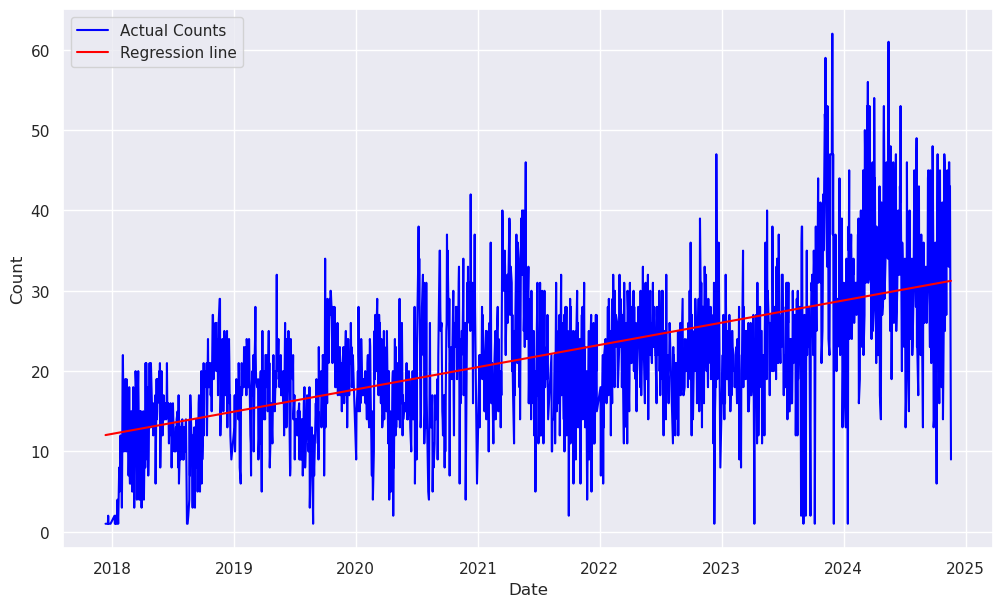

In [89]:
%matplotlib inline 
sns.set()

# Plot the results 
plt.figure(figsize = (12, 7))
plt.plot(daily_appointments_ts["Date"], daily_appointments_ts["appointment_count"],
        label = "Actual Counts", color = "blue")
plt.plot(daily_appointments_ts["Date"], predicted_counts,
        label = "Regression line", color = "red")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

## Time series Decompisition 

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose 

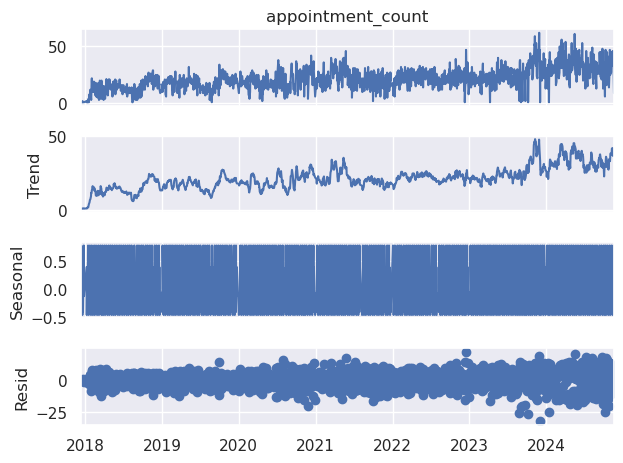

In [91]:
# Set the date as index 
daily_appointments_ts.set_index("Date", inplace=True)

# Perform decomposition
result = seasonal_decompose(daily_appointments_ts["appointment_count"], 
                           model = "additive", period=7)

# Plot the result 
result.plot()
plt.show()

## Moving average

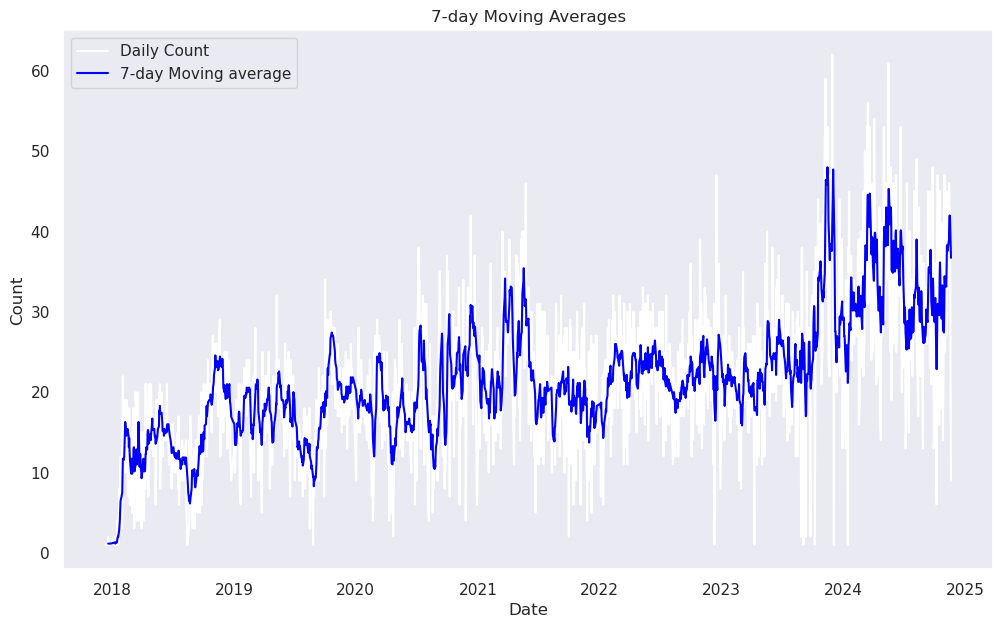

In [104]:
# 7 days moving average 
daily_appointments_ts["7_day_MA"] = daily_appointments_ts["appointment_count"].rolling(window=7).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(daily_appointments_ts.index, daily_appointments_ts["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(daily_appointments_ts.index, daily_appointments_ts["7_day_MA"],
        label = "7-day Moving average", color="blue")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("7-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

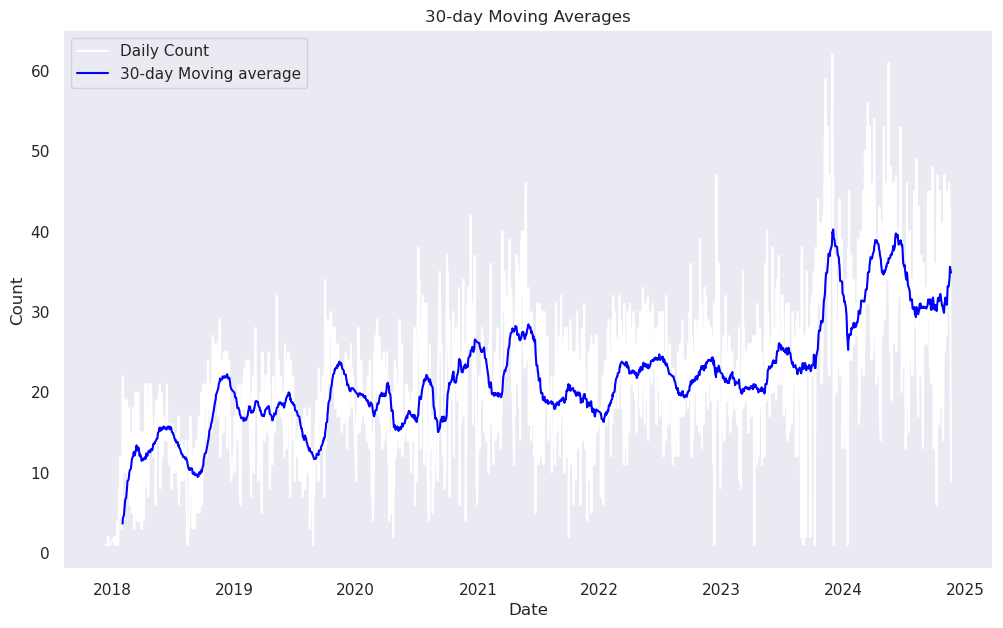

In [102]:
# 30 days moving average 
daily_appointments_ts["30_day_MA"] = daily_appointments_ts["appointment_count"].rolling(window=30).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(daily_appointments_ts.index, daily_appointments_ts["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(daily_appointments_ts.index, daily_appointments_ts["30_day_MA"],
        label = "30-day Moving average", color="blue")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("30-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

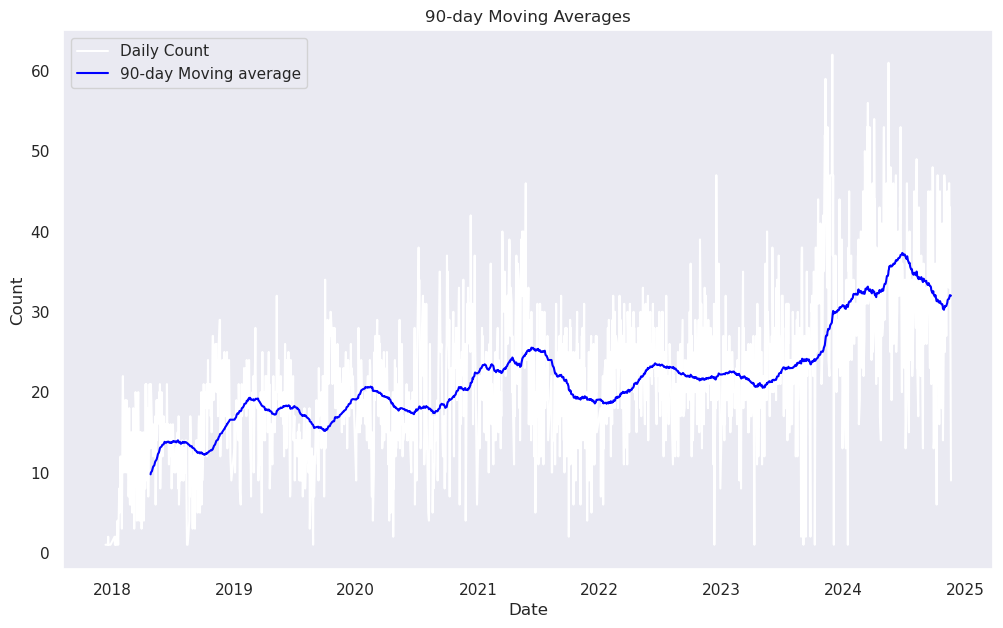

In [103]:
# 90 days moving average 
daily_appointments_ts["90_day_MA"] = daily_appointments_ts["appointment_count"].rolling(window=90).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(daily_appointments_ts.index, daily_appointments_ts["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(daily_appointments_ts.index, daily_appointments_ts["90_day_MA"],
        label = "90-day Moving average", color="blue")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("90-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

## Cambridge Time Series
I will narrow down to the successfull appointments with MH Infusion at cambridge all time and visualize the trend. 


In [143]:
cambridge_mh_success = appointment_df[(appointment_df["Appt Status Description"]=="Seen")\
               &(appointment_df["Facility City"]=="CAMBRIDGE")\
               &(appointment_df["Appt Type Group"]=="MH Infusion")].reset_index(drop=True)

cambridge_mh_success.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID,Date
0,239,Seen,01/22/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,3,1,"5,286",2018-01-22
1,242,Seen,02/02/18,6,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,6,1,"5,348",2018-02-02
2,243,Seen,NaN,10,DANIEL THOMPSON,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,7,1,"5,352",NaT
3,245,Seen,01/23/18,10,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,9,1,"5,352",2018-01-23
4,246,Seen,02/02/18,2,EDWARD ALMEIDA,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,10,1,"5,286",2018-02-02


In [144]:
# Clean the data
## Get the required columns 
cambridge_mh_success = cambridge_mh_success[["Date", "Appointment UID"]]

## remove the null values  
cambridge_mh_success.dropna(how="any", inplace=True)
cambridge_mh_success.reset_index(drop=True, inplace=True)

## Sort values by data 
cambridge_mh_success.sort_values("Date").reset_index(drop=True)

## Group the data by date  
cambridge_mh_success = cambridge_mh_success.groupby("Date").count().reset_index()
cambridge_mh_success.rename({"Appointment UID":"appointment_count"}, 
                            axis=1, inplace=True)

## Drop the first row 
cambridge_mh_success.drop(index=0, inplace=True)
cambridge_mh_success.reset_index(drop=True)

## Set date as index
cambridge_mh_success.set_index("Date", inplace=True)

cambridge_mh_success.head()

,appointment_count
Date,
2018-01-08,1
2018-01-11,1
2018-01-15,1
2018-01-16,1
2018-01-22,2


### Moving averages 

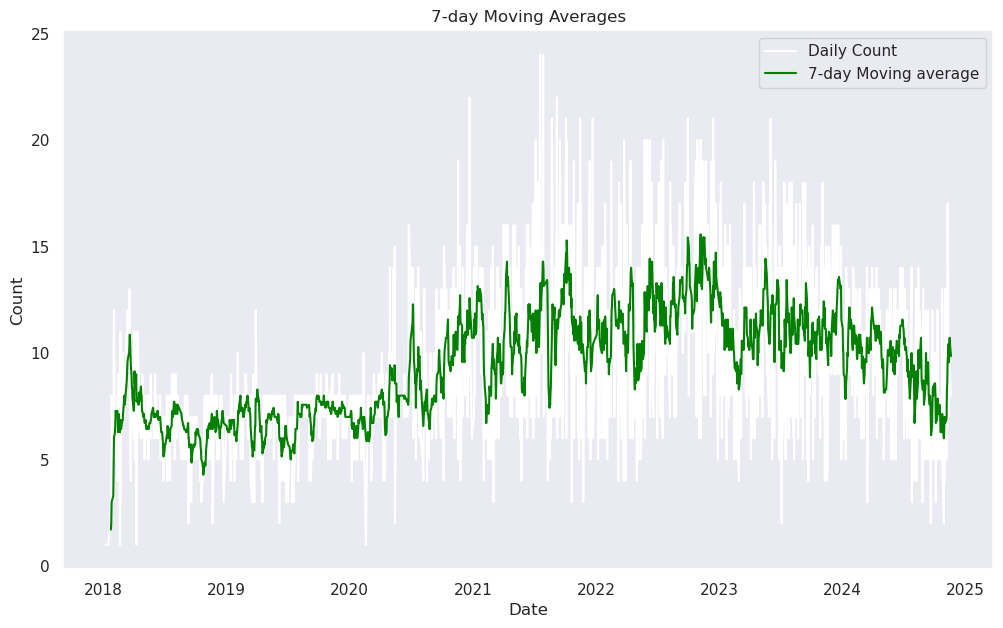

In [145]:
# 7 days moving average 
cambridge_mh_success["7_day_MA"] = cambridge_mh_success["appointment_count"].rolling(window=7).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(cambridge_mh_success.index, cambridge_mh_success["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(cambridge_mh_success.index, cambridge_mh_success["7_day_MA"],
        label = "7-day Moving average", color="green")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("7-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

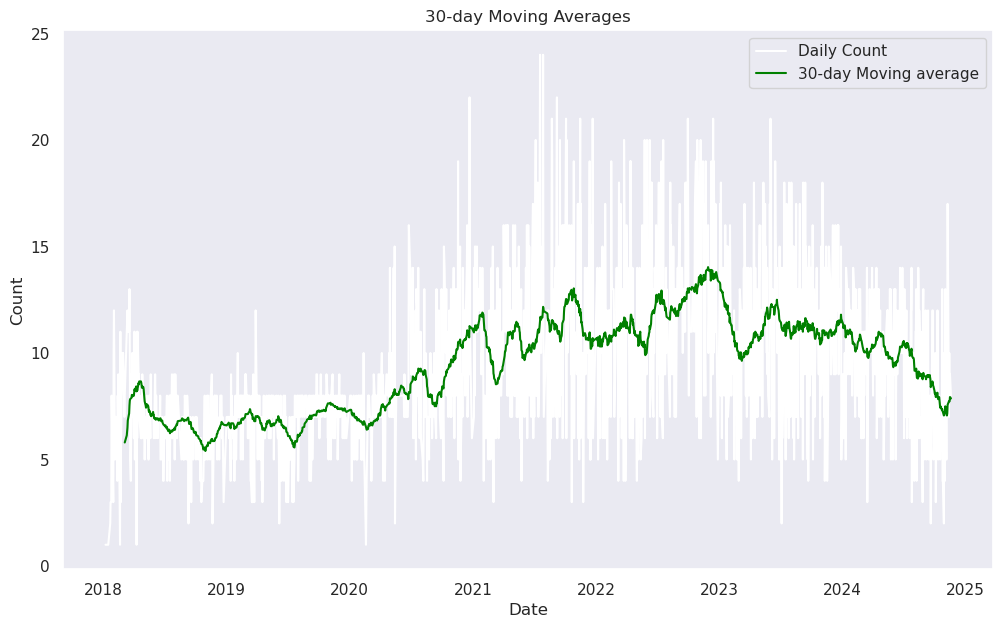

In [146]:
# 30 days moving average 
cambridge_mh_success["30_day_MA"] = cambridge_mh_success["appointment_count"].rolling(window=30).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(cambridge_mh_success.index, cambridge_mh_success["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(cambridge_mh_success.index, cambridge_mh_success["30_day_MA"],
        label = "30-day Moving average", color="green")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("30-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

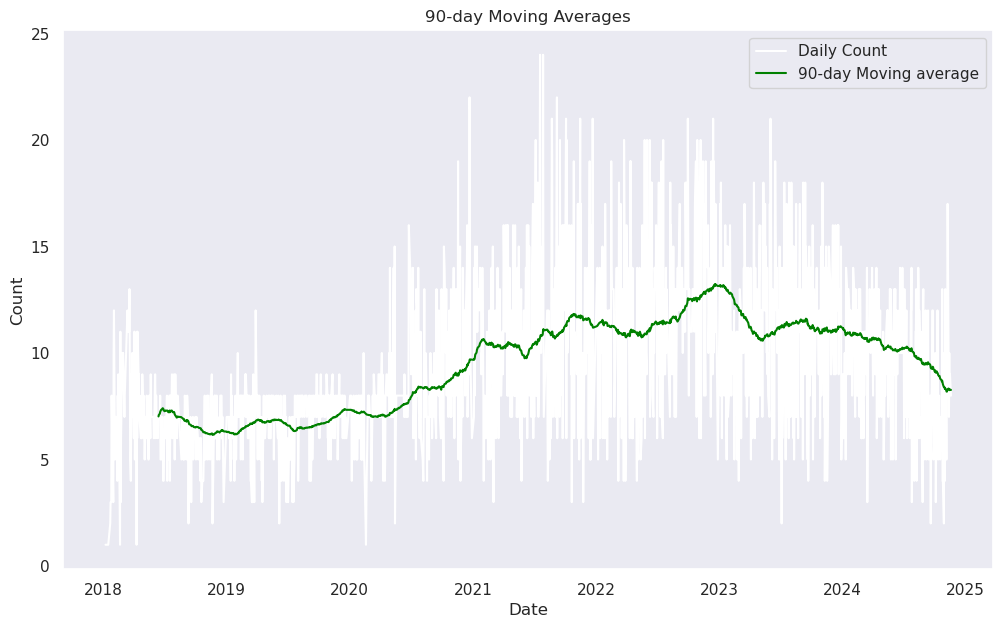

In [155]:
# 90 days moving average 
cambridge_mh_success["90_day_MA"] = cambridge_mh_success["appointment_count"].rolling(window=90).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(cambridge_mh_success.index, cambridge_mh_success["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(cambridge_mh_success.index, cambridge_mh_success["90_day_MA"],
        label = "90-day Moving average", color="green")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("90-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

## Other locations Moving Averages 

In [147]:
other_mh_success = appointment_df[(appointment_df["Appt Status Description"]=="Seen")\
               &(appointment_df["Facility City"]!="CAMBRIDGE")\
               &(appointment_df["Appt Type Group"]=="MH Infusion")].reset_index(drop=True)

other_mh_success.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID,Date
0,9166,Seen,04/23/18,9,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,KATE,"BRENNER,DANIEL A",NaN,Other,DR. BRENNER,"1,490",1,"5,351",2018-04-23
1,9169,Seen,04/23/18,124,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,KATE,"BRENNER,DANIEL A",NaN,Other,DR. BRENNER,"1,493",1,"6,476",2018-04-23
2,9415,Seen,04/23/18,45,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,KATE,"BRENNER,DANIEL A",NaN,Other,DR. BRENNER,"1,507",1,"5,409",2018-04-23
3,13859,Seen,NaN,167,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",NaN,Other,DR. BRENNER,"2,054",1,"7,792",NaT
4,20698,Seen,08/21/18,223,DANA COLLEY,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",NaN,Other,3C,"2,749",1,"9,278",2018-08-21


In [148]:
# Clean the data
## Get the required columns 
other_mh_success = other_mh_success[["Date", "Appointment UID", "Facility City"]]

## remove the null values  
other_mh_success.dropna(how="any", inplace=True)
other_mh_success.reset_index(drop=True, inplace=True)

# Drop the facility city column
other_mh_success.drop("Facility City", axis=1, inplace=True)

## Sort values by data 
other_mh_success.sort_values("Date").reset_index(drop=True)

## Group the data by date  
other_mh_success = other_mh_success.groupby("Date").count().reset_index()
other_mh_success.rename({"Appointment UID":"appointment_count"}, 
                            axis=1, inplace=True)

## Drop the first row 
other_mh_success.drop(index=0, inplace=True)
other_mh_success.reset_index(drop=True)

## Set date as index
other_mh_success.set_index("Date", inplace=True)

other_mh_success.head()

,appointment_count
Date,
2023-01-16,1
2023-01-20,2
2023-01-23,2
2023-01-25,2
2023-01-27,1


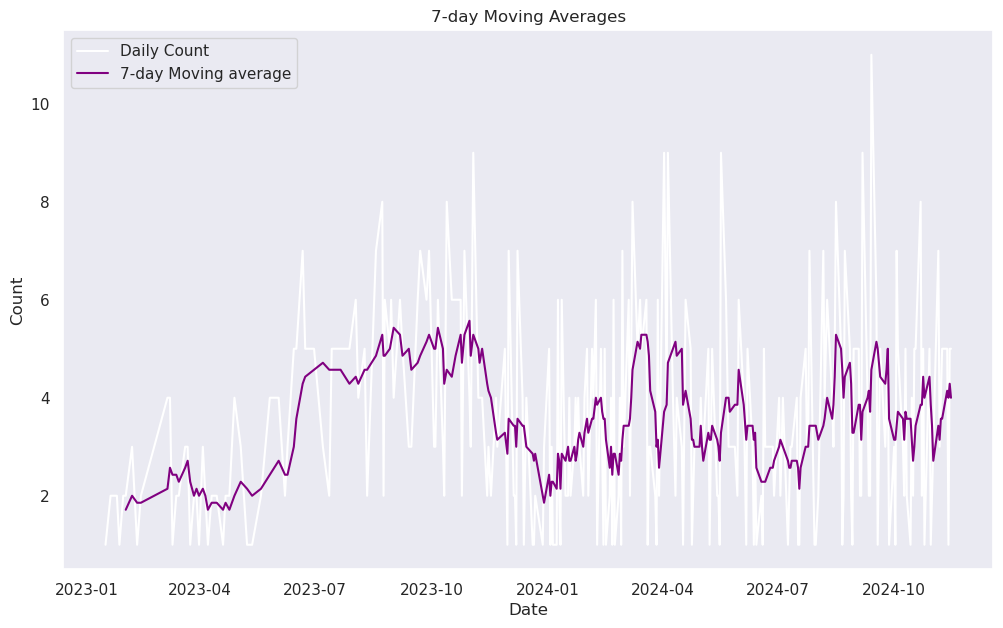

In [152]:
# 7 days moving average 
other_mh_success["7_day_MA"] = other_mh_success["appointment_count"].rolling(window=7).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(other_mh_success.index, other_mh_success["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(other_mh_success.index, other_mh_success["7_day_MA"],
        label = "7-day Moving average", color="purple")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("7-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

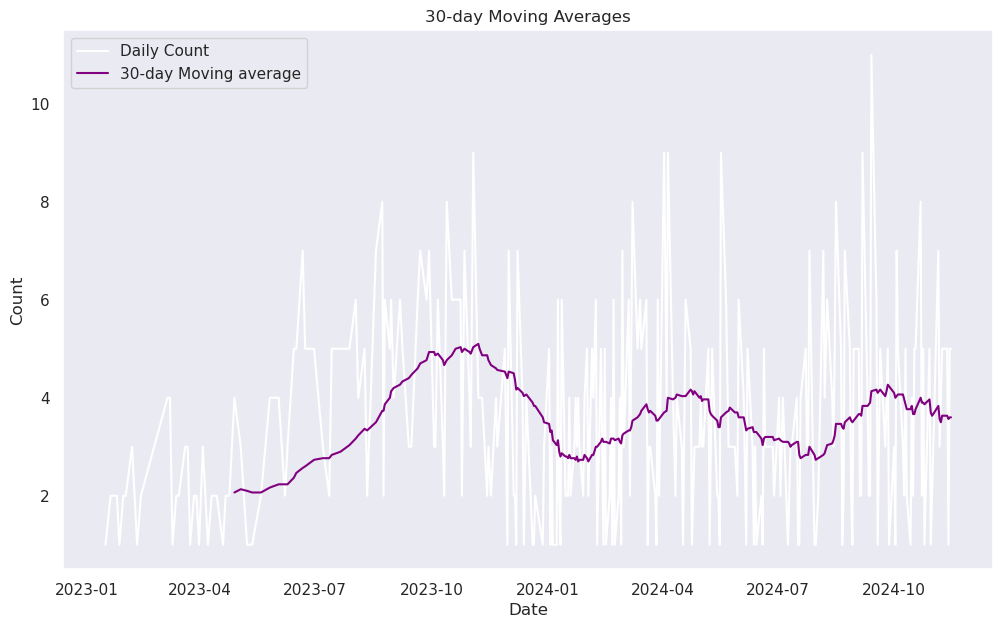

In [156]:
# 30 days moving average 
other_mh_success["30_day_MA"] = other_mh_success["appointment_count"].rolling(window=30).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(other_mh_success.index, other_mh_success["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(other_mh_success.index, other_mh_success["30_day_MA"],
        label = "30-day Moving average", color="purple")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("30-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

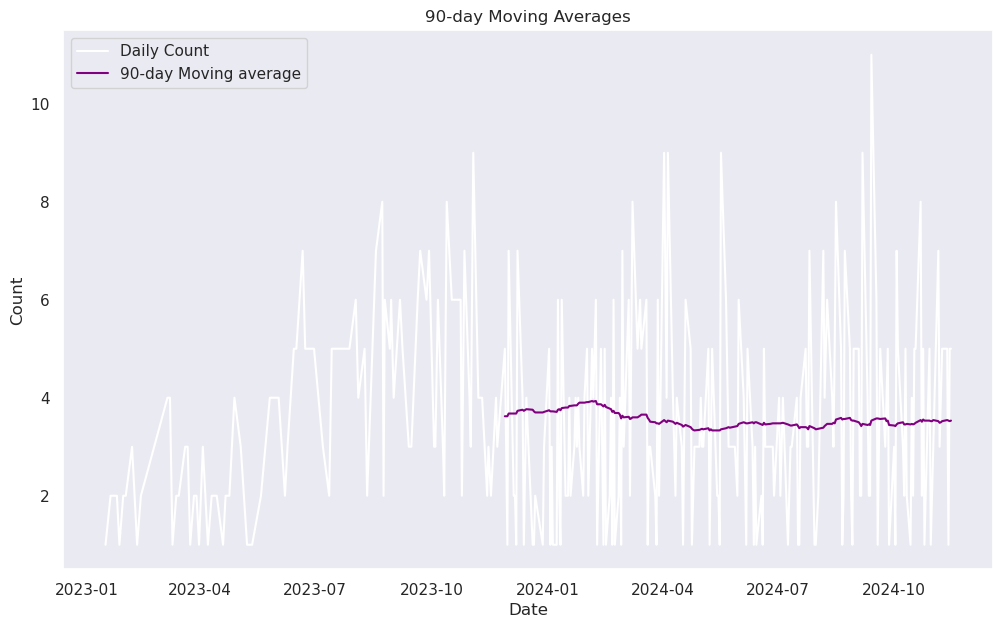

In [157]:
# 90 days moving average 
other_mh_success["90_day_MA"] = other_mh_success["appointment_count"].rolling(window=90).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(other_mh_success.index, other_mh_success["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(other_mh_success.index, other_mh_success["90_day_MA"],
        label = "90-day Moving average", color="purple")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("90-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

### Successfull MH Infusion - mid 2023 onwards
Since there has been a drop in MH infusion from mid 2023 to 2024 in Cambridge Facility, we will explore the data from 2023 and find where did the fall exactly begin. 

In [169]:
# Filter the data 
decided_date = pd.to_datetime("2023-06-01")
cambridge_mh_success_2023 = cambridge_mh_success[cambridge_mh_success.index>=decided_date]
cambridge_mh_success_2023.head()

,appointment_count,7_day_MA,30_day_MA,90_day_MA
Date,,,,
2023-06-01,11,10.857143,11.866667,10.833333
2023-06-02,21,11.857143,12.133333,10.900000
2023-06-05,12,12.285714,12.300000,10.955556
2023-06-06,10,12.285714,12.233333,10.977778
2023-06-07,5,11.857143,12.166667,10.911111


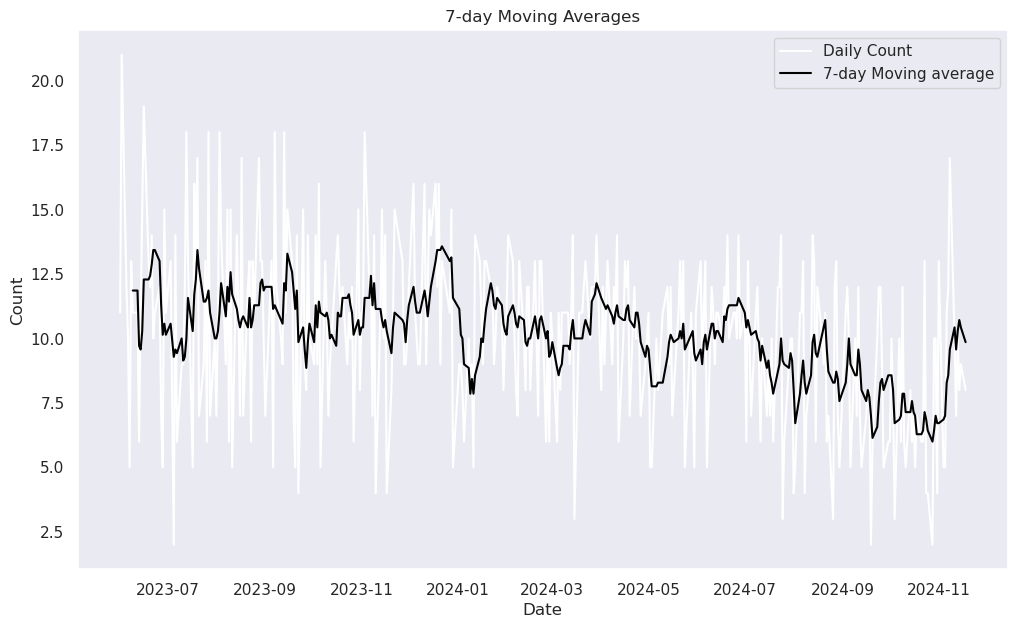

In [170]:
# 7 days moving average 
cambridge_mh_success_2023["7_day_MA"] = cambridge_mh_success_2023["appointment_count"].rolling(window=7).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(cambridge_mh_success_2023.index, cambridge_mh_success_2023["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(cambridge_mh_success_2023.index, cambridge_mh_success_2023["7_day_MA"],
        label = "7-day Moving average", color="black")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("7-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

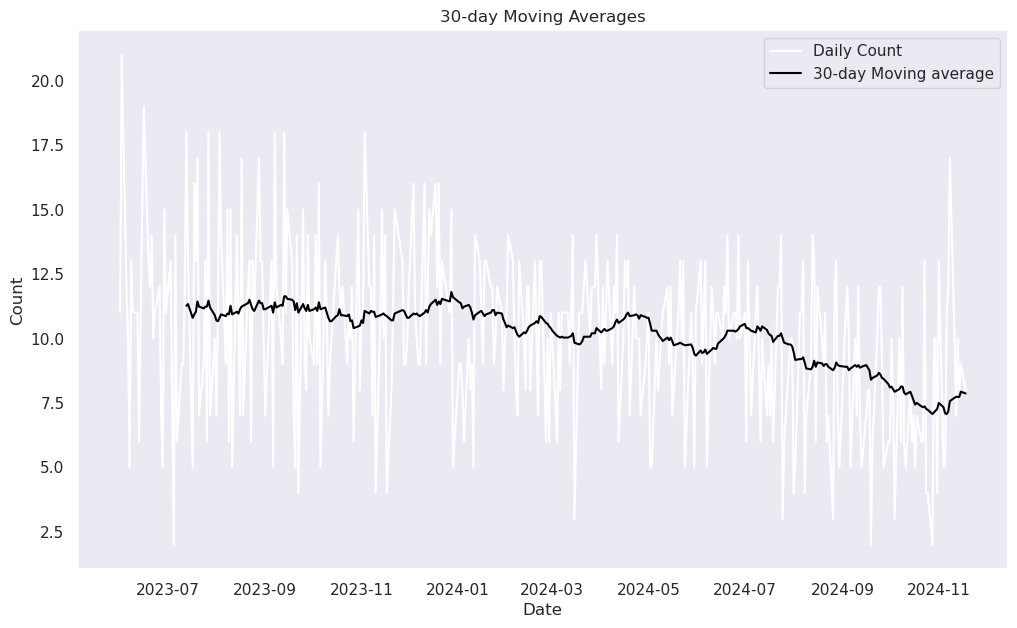

In [171]:
# 30 days moving average 
cambridge_mh_success_2023["30_day_MA"] = cambridge_mh_success_2023["appointment_count"].rolling(window=30).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(cambridge_mh_success_2023.index, cambridge_mh_success_2023["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(cambridge_mh_success_2023.index, cambridge_mh_success_2023["30_day_MA"],
        label = "30-day Moving average", color="black")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("30-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

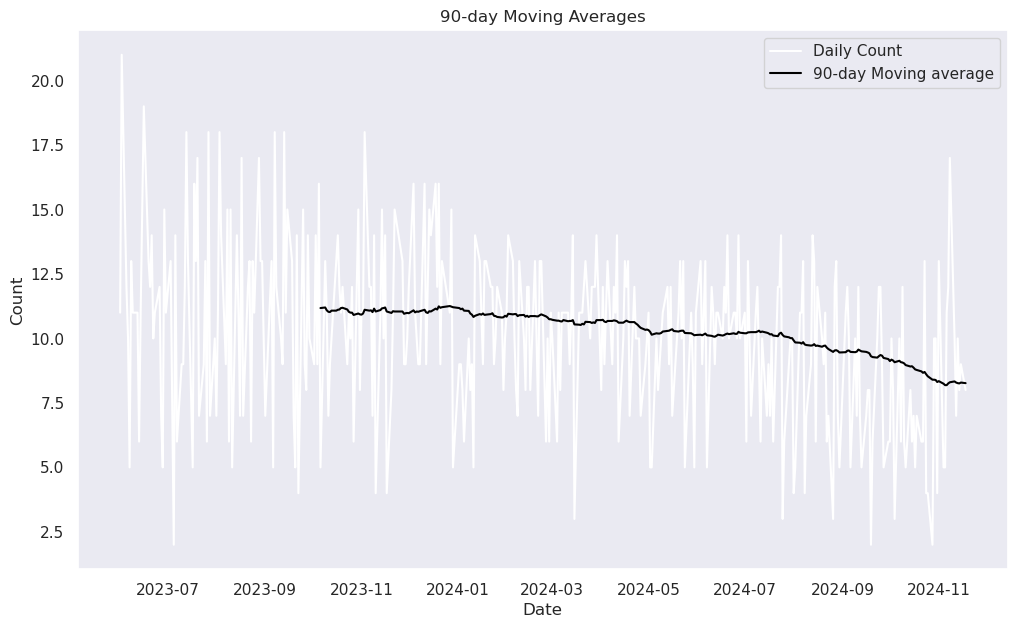

In [172]:
# 90 days moving average 
cambridge_mh_success_2023["90_day_MA"] = cambridge_mh_success_2023["appointment_count"].rolling(window=90).mean()

# Plot the data  
plt.figure(figsize=(12, 7))
plt.plot(cambridge_mh_success_2023.index, cambridge_mh_success_2023["appointment_count"],
        label = "Daily Count", color="white")
plt.plot(cambridge_mh_success_2023.index, cambridge_mh_success_2023["90_day_MA"],
        label = "90-day Moving average", color="black")
plt.xlabel("Date")
plt.ylabel("Count")

plt.title("90-day Moving Averages")
plt.legend()
plt.grid()
plt.show()

In [176]:
# Calculate the appointment count difference 
cambridge_mh_success_2023["appointment_count"].max() - cambridge_mh_success_2023["appointment_count"].min()

19

In [178]:
# Moving average range
## 7 day MA
range1 = cambridge_mh_success_2023["7_day_MA"].max() - cambridge_mh_success_2023["7_day_MA"].min()
print(f"Cambridge 7 day moving average range: {range1}")

## 30 day MA
range2 = cambridge_mh_success_2023["30_day_MA"].max() - cambridge_mh_success_2023["30_day_MA"].min()
print(f"Cambridge 30 day moving average range: {range2}")

## 90 day MA
range3 = cambridge_mh_success_2023["90_day_MA"].max() - cambridge_mh_success_2023["90_day_MA"].min()
print(f"Cambridge 90 day moving average range: {range3}")

Cambridge 7 day moving average range: 7.571428571428571
Cambridge 30 day moving average range: 4.733333333333334
Cambridge 90 day moving average range: 3.066666666666668
